# Importing the libraries

In [1]:
import pandas as pd
import re
import pickle
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow.keras.layers import TextVectorization
import string
from nltk.tokenize import word_tokenize

# Download NLTK resources (stopwords and WordNet)
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ropar_i9941t3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Shuffle and batch the dataset
batch_size = 32
seed = 42

# Vocabulary size and number of words in a sequence
vocab_size = 10000
sequence_length = 100

stop_words = tf.constant(stopwords.words("english"))

In [12]:
with open("../Artifacts/stop_words.pkl", "wb") as f:
    pickle.dump(stop_words, f)

# Exploratory data analysis

In [3]:
df = pd.read_csv("../Dataset/Job_text_features.csv")
df.drop(["Unnamed: 0"], inplace=True, axis=1)
df.head(5)

,description,requirements,benefits,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0
1,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0
3,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


In [4]:
# Checking percentage of missinng values
df.isnull().mean() * 100

description      0.005682
requirements    15.051992
benefits        40.388658
fraudulent       0.000000
dtype: float64

In [5]:
# Removing the missing values
df.dropna(inplace=True)

In [6]:
# Checking if there are any duplicate values
duplicate_counts = df.duplicated().sum()
if duplicate_counts > 0:

    # Storing all the duplicate data
    Duplicate_df = df[df.duplicated() == True]
    print(
        "Duplicate values found and stored in dataframe, dataframe size : ",
        Duplicate_df.shape[0],
    )
else:
    print("There are no duplicate values")

Duplicate values found and stored in dataframe, dataframe size :  1430


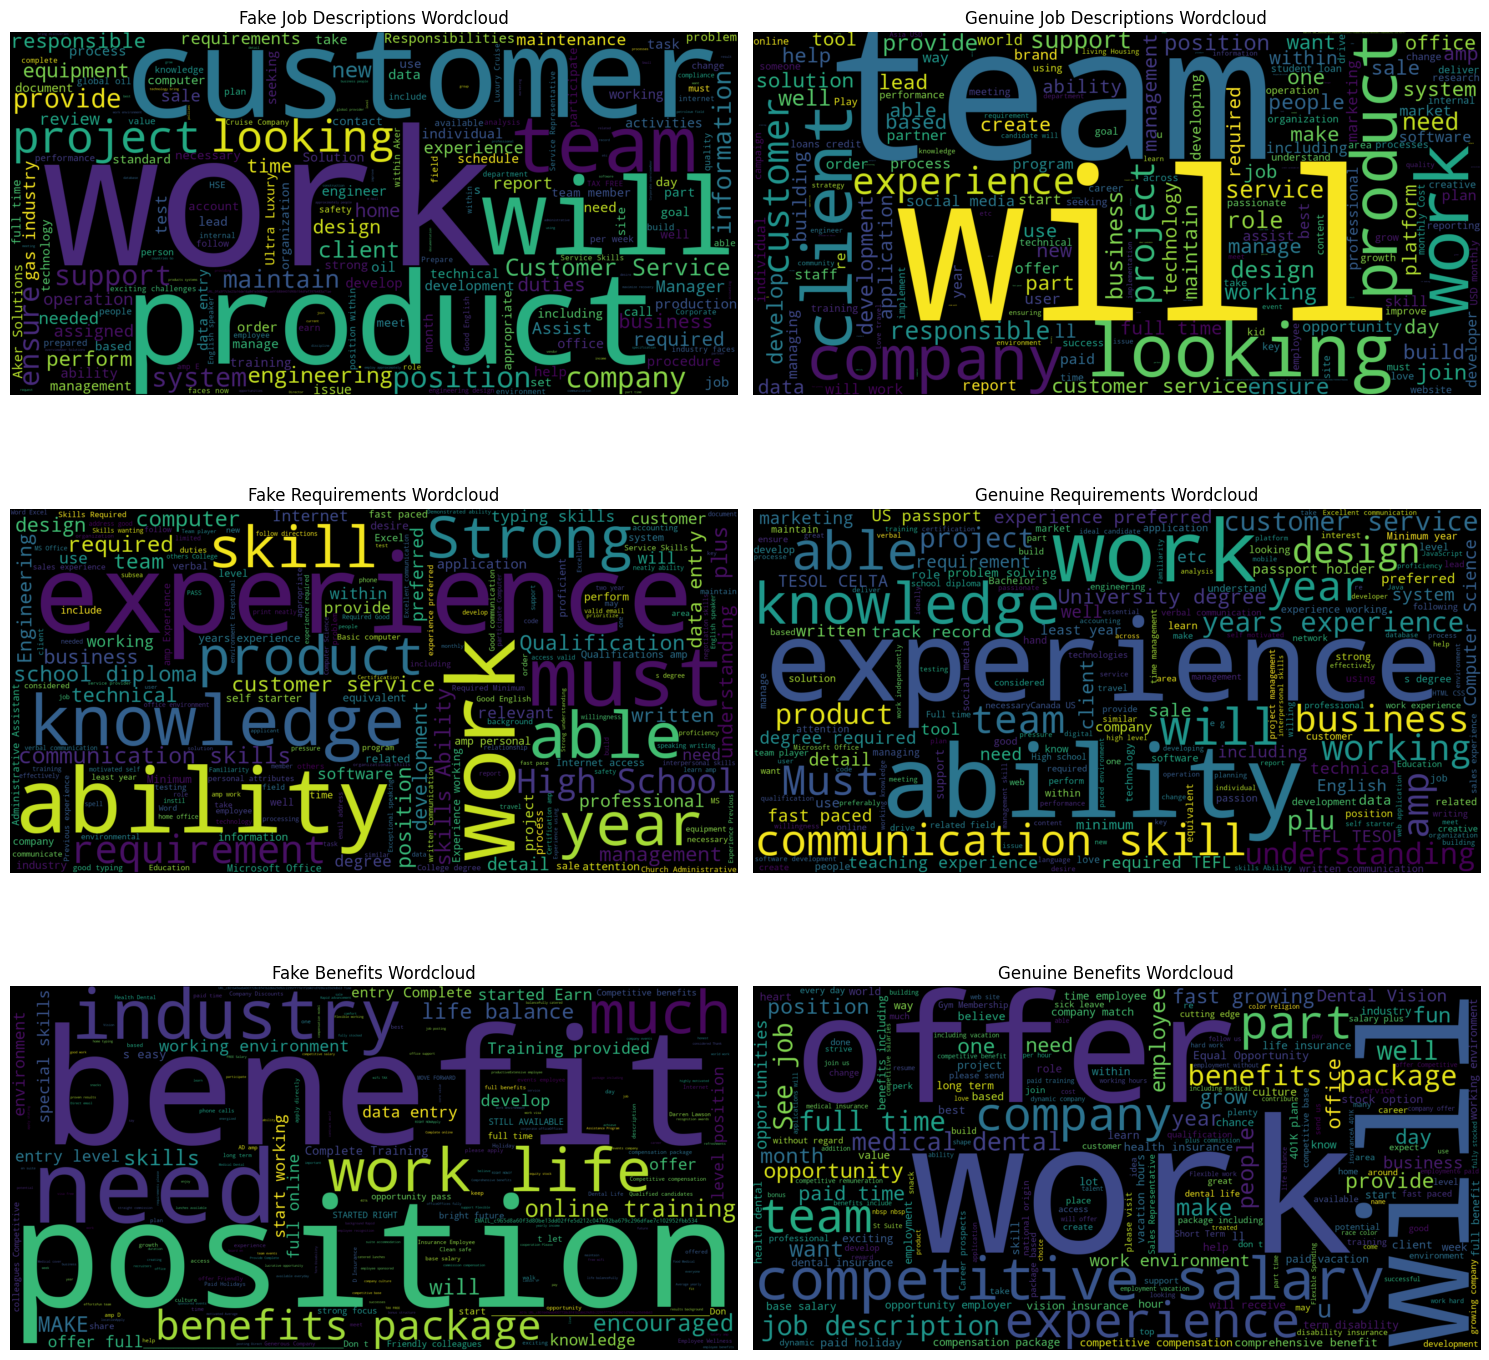

In [7]:
# Extracting the course titles and joining sentences into a single string
fake_jd = df[df["fraudulent"] == 1]["description"].values
genuine_jd = df[df["fraudulent"] == 0]["description"].values

fake_req = df[df["fraudulent"] == 1]["requirements"].values
genuine_req = df[df["fraudulent"] == 0]["requirements"].values

fake_benefits = df[df["fraudulent"] == 1]["benefits"].values
genuine_benefits = df[df["fraudulent"] == 0]["benefits"].values

# Joining all job descriptions, requirements, and benefits into single strings
fake_jd_string = " ".join(fake_jd.tolist())
genuine_jd_string = " ".join(genuine_jd.tolist())

fake_req_string = " ".join(fake_req.tolist())
genuine_req_string = " ".join(genuine_req.tolist())

fake_benefits_string = " ".join(fake_benefits.tolist())
genuine_benefits_string = " ".join(genuine_benefits.tolist())

# Set other parameters for word clouds
wordcloud1 = WordCloud(width=1600, height=800).generate(fake_jd_string)
wordcloud2 = WordCloud(width=1600, height=800).generate(genuine_jd_string)
wordcloud3 = WordCloud(width=1600, height=800).generate(fake_req_string)
wordcloud4 = WordCloud(width=1600, height=800).generate(genuine_req_string)
wordcloud5 = WordCloud(width=1600, height=800).generate(fake_benefits_string)
wordcloud6 = WordCloud(width=1600, height=800).generate(genuine_benefits_string)

# Plotting
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

ax[0, 0].imshow(wordcloud1, interpolation="bilinear")
ax[0, 0].set_title("Fake Job Descriptions Wordcloud")
ax[0, 0].axis("off")

ax[0, 1].imshow(wordcloud2, interpolation="bilinear")
ax[0, 1].set_title("Genuine Job Descriptions Wordcloud")
ax[0, 1].axis("off")

ax[1, 0].imshow(wordcloud3, interpolation="bilinear")
ax[1, 0].set_title("Fake Requirements Wordcloud")
ax[1, 0].axis("off")

ax[1, 1].imshow(wordcloud4, interpolation="bilinear")
ax[1, 1].set_title("Genuine Requirements Wordcloud")
ax[1, 1].axis("off")

ax[2, 0].imshow(wordcloud5, interpolation="bilinear")
ax[2, 0].set_title("Fake Benefits Wordcloud")
ax[2, 0].axis("off")

ax[2, 1].imshow(wordcloud6, interpolation="bilinear")
ax[2, 1].set_title("Genuine Benefits Wordcloud")
ax[2, 1].axis("off")

plt.tight_layout()
plt.show()

In [8]:
df['fraudulent'].value_counts()

fraudulent
0    9739
1     485
Name: count, dtype: int64

In [10]:
df[df['fraudulent'] == 1]

,description,requirements,benefits,fraudulent
98,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,1
172,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",1
179,Sales Executive,Sales Executive,Sales Executive,1
214,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,1
356,If you have experience in financing for auto s...,prior car sales expprior car loan financing exp,profit sharingcar allowancecompany car,1
...,...,...,...,...
17542,Could this be the most rewarding opportunity a...,What you need:You'll thrive on working in a fa...,"What's on offer:Realistic OTE of £30,000 (unca...",1
17544,ADMINISTRATIVE &amp; OFFICE ASSISTANTJOB DESCR...,Primary Responsibilities include but not limit...,You would be eligible to Benefits after 1 mont...,1
17547,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,1
17548,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,1


In [14]:
fake_data.shape[0]

485

,description,requirements,benefits,fraudulent
14794,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0
8739,50pixels is looking for an experienced WordPre...,"PHP, MySQL, Wordpress, Wordpress Plugin, Wordp...","Work is remote, project based and managed on y...",0
14109,Implement social media strategy and best pract...,Up to 3 years experience with social media pla...,"Competitive base salary, bonus programs, profe...",0
9124,• Answering incoming calls and securing ord...,• 6 months work experience • High school...,"We believe in the philosophy ‘be healthy, live...",0
15884,Unify is seeking for a Quality Assurance engin...,"Education, Experience &amp; Profile:BS/MS in C...",Competitive remuneration packagePrivate insura...,0
...,...,...,...,...
10822,"ASSESS+RE, a seed-stage startup, is looking fo...",You should:Be passionate about building an awe...,And let’s not forget the financial side ...Com...,0
9096,We are looking for the next marketing supersta...,Ideal candidate will have:Experience in SEOAbi...,Interested?We offer possibilities for career p...,0
12465,Fine Tune is a nationally growing expense mana...,Responsibilities:- Ability to effectivel...,Benefits- Competitive base salary plus g...,0
15656,We are seeking a passionate designer with 3-5 ...,Experience designing and launching efficient u...,Why join our team?Shapeways is breaking new gr...,0


In [23]:
fake_data = df[df['fraudulent'] == 1]
geuniune_data = df[df['fraudulent'] == 0].sample(fake_data.shape[0])

new_df = pd.concat([fake_data,geuniune_data],axis=0)
new_df = new_df.sample(frac=1)
new_df.reset_index(drop=True,inplace=True)

In [25]:
text_data_combined = new_df["description"] + " " + new_df["requirements"] + " " + new_df["benefits"]
target_data = new_df["fraudulent"].values

# Create a dataset from the input text features and target output data
raw_text_ds = tf.data.Dataset.from_tensor_slices((text_data_combined, target_data))

# Shuffling the items
seed = 42
raw_text_ds = raw_text_ds.shuffle(len(new_df), seed=seed)

In [26]:
count = 1
for text, label in raw_text_ds:
    if count <= 3:
        print("TEXT" + str(count) + ":", text)
        count = count + 1
    else:
        break

TEXT1: tf.Tensor(b"Jobs for Specialist Gastroenterologist in Dubai We are\xc2\xa0The India's Largest Medical Recruitment company Roland &amp; AssociatesWe are\xc2\xa0Hiring Specialist Gastroenterologist Doctors to work with one of the reputed Health Care Group\xc2\xa0in UAE which provides good standard of living and assured career growth.\xc2\xa0 Job Requirement Designation :\xc2\xa0Specialist Gastroenterologist Qualification :\xc2\xa0DM/DNB Experience :\xc2\xa03+ years post qualification Salary :\xc2\xa0As per standards(Tax free salary + Benefits) Job Location :\xc2\xa0Dubai/Abu DhabiInterested professionals who wish to explore this opening can send your updated CV to #EMAIL_0687b9656f843689dea8f44da6cafa830fe2dc77029c46e7b0d0c926dcbc1204#\xc2\xa0OR Feel Free To Call me on +91 80 42821630 (Anoop Gurunathan) Gastroenterologist Tax Free Salary", shape=(), dtype=string)
TEXT2: tf.Tensor(b'Sewing machinist needed by friendly London-based toy company to create basic garments at miniature s

In [27]:
count = 1
for text, label in raw_text_ds:
    if count <= 5:
        print("Label " + str(count) + ":", label)
        count = count + 1
    else:
        break

Label 1: tf.Tensor(0, shape=(), dtype=int64)
Label 2: tf.Tensor(1, shape=(), dtype=int64)
Label 3: tf.Tensor(0, shape=(), dtype=int64)
Label 4: tf.Tensor(0, shape=(), dtype=int64)
Label 5: tf.Tensor(0, shape=(), dtype=int64)


In [28]:
# Remove stop words
def remove_stopwords(token):
    return tf.math.logical_not(tf.reduce_any(tf.math.equal(stop_words, token)))

In [29]:
def process_text(input_data):
    """
    Output: Cleaned text tensor

    Description: This function will take a single raw text as input, remove all stopwords and punctuation, then lowercase the words to eliminate any ambiguity.
    Ultimately clean text will be returned as a tensor.
    """

    # Lowercase the input data
    lowercase = tf.strings.lower(input_data)

    # Remove punctuation
    no_punctuation = tf.strings.regex_replace(
        lowercase, "[%s]" % re.escape(string.punctuation), ""
    )

    # Tokenizing the words in the strings
    tokens = tf.strings.split(no_punctuation)

    filtered_tokens = tf.map_fn(remove_stopwords, tokens, fn_output_signature=tf.bool)

    # Filter tokens based on the boolean mask
    filtered_tokens = tf.boolean_mask(tokens, filtered_tokens)

    processed_text = tf.strings.reduce_join(filtered_tokens, separator=" ", axis=-1)
    return processed_text

In [30]:
# Cleaning all the texts
clean_train_ds = raw_text_ds.map(lambda x, y: (process_text(x), y))

In [31]:
print("Total strings : ", len(raw_text_ds))
print("Total Training strings (80:20) : ", int(len(raw_text_ds) * 0.8))
print("Total Testing strings : ", int(len(raw_text_ds) * 0.2))

Total strings :  970
Total Training strings (80:20) :  776
Total Testing strings :  194


In [32]:
def create_train_test_val(ds, train_size, val_size):

    # Creating batch and also Calculating total batches
    ds = ds.batch(batch_size)
    total_batches = len(ds)

    # Extracting training,testing and validation batch from the dataset (ds)
    train_ds_batches = int(train_size * total_batches)
    test_ds_batches = int(val_size * total_batches)

    # 80:20
    train_ds = ds.take(train_ds_batches)
    test_ds = ds.skip(train_ds_batches).take(test_ds_batches)

    # Catching and prefetching the dataset to improve data pipeline performance
    train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

    return train_ds, test_ds


# Calling the function
train_ds, test_ds = create_train_test_val(raw_text_ds, 0.8, 0.2)

In [33]:
# Display some benchmark statistics
tfds.benchmark(train_ds)


************ Summary ************



  0%|          | 0/24 [00:00<?, ?it/s]

Examples/sec (First included) 423.08 ex/sec (total: 25 ex, 0.06 sec)
Examples/sec (First only) 21.98 ex/sec (total: 1 ex, 0.05 sec)
Examples/sec (First excluded) 1765.54 ex/sec (total: 24 ex, 0.01 sec)


,duration,num_examples,avg
first+lasts,0.059091,25,423.076988
first,0.045497,1,21.979326
lasts,0.013594,24,1765.536723


In [19]:
# Display some benchmark statistics
tfds.benchmark(test_ds)


************ Summary ************



  0%|          | 0/64 [00:00<?, ?it/s]

Examples/sec (First included) 966.78 ex/sec (total: 65 ex, 0.07 sec)
Examples/sec (First only) 21.89 ex/sec (total: 1 ex, 0.05 sec)
Examples/sec (First excluded) 2970.43 ex/sec (total: 64 ex, 0.02 sec)


,duration,num_examples,avg
first+lasts,0.067233,65,966.784425
first,0.045688,1,21.887822
lasts,0.021546,64,2970.432638


In [34]:
# Defining the text vectorization layer
vectorize_layer = TextVectorization(
    standardize=None,
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length,
)

In [35]:
# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
train_text_ds = clean_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text_ds)

In [ ]:
# Get the learned vocabulary
vocabulary = vectorize_layer.get_vocabulary()

# Print the vocabulary
print("Vocabulary:", vocabulary)

In [37]:
model = tf.keras.Sequential(
    [
        vectorize_layer,
        tf.keras.layers.Embedding(
            input_dim=len(vectorize_layer.get_vocabulary()),
            output_dim=64,
            mask_zero=True,
        ),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)

In [38]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=["accuracy"],
)

In [39]:
history = model.fit(train_ds, epochs=30, validation_data=test_ds)

Epoch 1/30



KeyboardInterrupt: 

In [25]:
model.save("/kaggle/working/my_model.keras")